In [181]:
import os
import pandas as pd

dir = "/Users/sryhandiniputeri/bluesky/log/comm"
subdirs = next(os.walk(dir))[1]
os.chdir(dir)

In [182]:
fullpath = []
statistic = {}

for subdir in subdirs:
    statistic[subdir] = {}
    lastdir = dir + "/" + subdir
    subsubdir_list = next(os.walk(lastdir))[1]
    
    for subsubdir in subsubdir_list:
        statistic[subdir][subsubdir] = {}
        lastdir = dir + "/" + subdir + "/" + subsubdir
        fullpath.append(lastdir)

print(statistic)
lastdir_list.sort()


{'comm_noise': {'DT_15_RPZ_50_hpos_15.0': {}, 'DT_15_RPZ_50_hpos_1.5': {}, 'DT_6_RPZ_50_hpos_5.0': {}, 'DT_6_RPZ_50_hpos_15.0': {}, 'DT_50_RPZ_50_hpos_15.0': {}, 'DT_50_RPZ_50_hpos_5.0': {}, 'DT_100_RPZ_50_hpos_1.5': {}, 'DT_100_RPZ_50_hpos_15.0': {}, 'DT_15_RPZ_50_hpos_5.0': {}, 'DT_6_RPZ_50_hpos_1.5': {}, 'DT_50_RPZ_50_hpos_1.5': {}, 'DT_100_RPZ_50_hpos_5.0': {}}, 'comm_noise_2s': {'DT_15_RPZ_50_hpos_15.0': {}, 'DT_15_RPZ_50_hpos_1.5': {}, 'DT_6_RPZ_50_hpos_5.0': {}, 'DT_6_RPZ_50_hpos_15.0': {}, 'DT_50_RPZ_50_hpos_15.0': {}, 'DT_50_RPZ_50_hpos_5.0': {}, 'DT_100_RPZ_50_hpos_1.5': {}, 'DT_100_RPZ_50_hpos_15.0': {}, 'DT_15_RPZ_50_hpos_5.0': {}, 'DT_6_RPZ_50_hpos_1.5': {}, 'DT_50_RPZ_50_hpos_1.5': {}, 'DT_100_RPZ_50_hpos_5.0': {}}, 'comm_no_noise': {'DT_15_RPZ_50_hpos_15.0': {}, 'DT_15_RPZ_50_hpos_1.5': {}, 'DT_6_RPZ_50_hpos_5.0': {}, 'DT_6_RPZ_50_hpos_15.0': {}, 'DT_50_RPZ_50_hpos_15.0': {}, 'DT_50_RPZ_50_hpos_5.0': {}, 'DT_100_RPZ_50_hpos_1.5': {}, 'DT_100_RPZ_50_hpos_15.0': {}, 'DT_15

In [183]:
def get_los_sev(path):
  for dirname, _, filenames in os.walk(path):
      filename_index = 0
      los_sev = []

      for filename in filenames:
        if(filename[:3] == 'cpa'):
          filename_index += 1
          full_filename = os.path.join(dirname, filename)

          df = pd.read_csv(full_filename, index_col = 0)
          if('rpz_30' in full_filename):
            dictionary = {(index, column): (30-value)/30*100 for index, row in df.iterrows() for column, value in row.items() if value < 100}
          else:
            dictionary = {(index, column): (50-value)/50*100 for index, row in df.iterrows() for column, value in row.items() if value < 100}
            
          values = list(dictionary.values())
          los_sev.extend(values)
      
  return los_sev



In [184]:
for subdir in subdirs:
    statistic[subdir] = {}
    lastdir = dir + "/" + subdir
    subsubdir_list = next(os.walk(lastdir))[1]
    
    for subsubdir in subsubdir_list:
        lastdir = dir + "/" + subdir + "/" + subsubdir
        statistic[subdir][subsubdir] = {'LoSSev': get_los_sev(lastdir)}

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

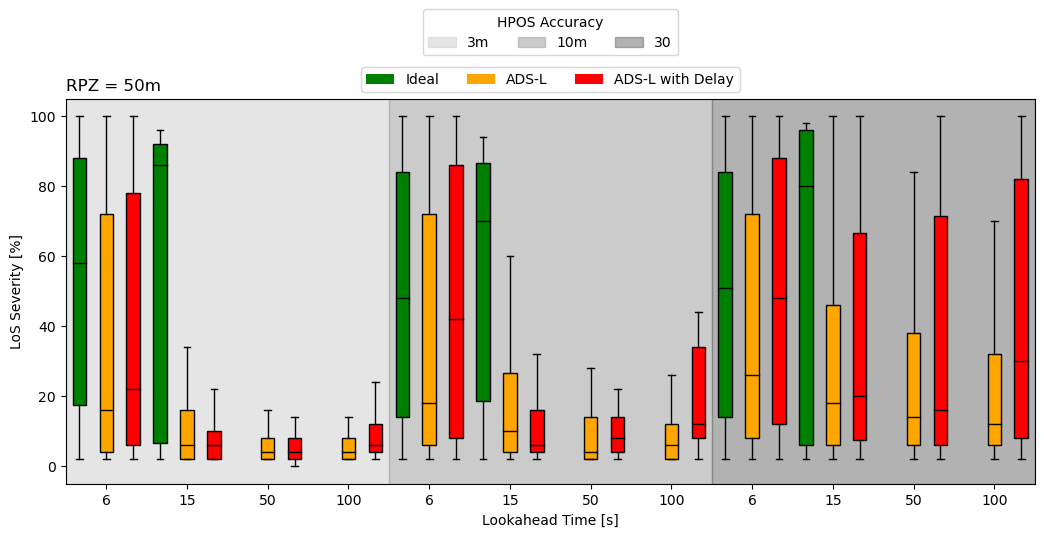

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
 
dt_lookahead_list = [6, 15, 50, 100]
rpz_list = ['50']
hpos_list = [1.5, 5.0, 15.0]

figure_idx = 0

data = []

for hpos in hpos_list:

    figure_idx += 1
    plt.figure(figure_idx)
    for RPZ in rpz_list:
        for dt_lookahead in dt_lookahead_list:
    #         for cond in ['comm_ideal', 'comm_no_noise', 'comm_noise']:
            for cond in ['comm_ideal', 'comm_no_noise', 'comm_noise']:
                data.append(statistic[cond][f'DT_{dt_lookahead}_RPZ_{RPZ}_hpos_{hpos}']['LoSSev'])
            
boxplot = plt.boxplot(data, showfliers=False, patch_artist=True)

plt.xticks(range(2, 36, 3))
ax = plt.gca()
ax.set_xticklabels(['6', '15', '50', '100'] * 3)

colors = plt.cm.gray(np.linspace(0.8, 0.2, 4))
area_1 = ax.axvspan(0.5, 12.5, alpha=0.5, color=colors[0])
area_2 = ax.axvspan(12.5, 24.5, alpha=0.5, color=colors[1])
area_3 = ax.axvspan(24.5, 36.5, alpha=0.5, color=colors[2])

colors = ['green', 'orange', 'red'] * len(dt_lookahead_list) * len(rpz_list) * len(hpos_list)

for box, color in zip(boxplot['boxes'], colors):
    box.set(facecolor=color)

for median in boxplot['medians']:
    median.set(color='black')

legend_handles = [mpatches.Patch(facecolor=colors[0]), mpatches.Patch(facecolor=colors[1]), mpatches.Patch(facecolor=colors[2])]

#     for color in colors:
#         legend_handles.append(mpatches.Patch(facecolor=color))

legend_labels = ['Ideal', 'ADS-L', 'ADS-L with Delay']
legend1 = plt.legend(legend_handles, legend_labels, ncols = 3, bbox_to_anchor=(0.5, 1.1), loc="upper center")
legend2 = plt.legend((area_1, area_2, area_3), ('3m', '10m', '30'), bbox_to_anchor=(0.5, 1.25), loc="upper center", ncol = 3, title = 'HPOS Accuracy')

plt.gca().add_artist(legend1)
# plt.gca().add_artist(legend2)

# plt.title(f'HPOS 95% Bound {hpos}')
plt.xlabel("Lookahead Time [s]")
plt.ylabel("LoS Severity [%]")
plt.title("RPZ = 50m", loc = "left")
fig = plt.gcf()
fig.set_size_inches(12.5, 5)


In [186]:
def get_ipr(path):
    for dirname, _, filenames in os.walk(path):
        ipr_list = []

        for filename in filenames:
            full_filename = os.path.join(dirname, filename)

            if('LoggingADSL' in filename):
                df = pd.read_csv(full_filename)
                conf = df.iloc[-1]['nb_conf_total']
                los = df.iloc[-1]['nb_los_total']
                ipr = (conf-los)/conf*100
                ipr_list.append(ipr)

        return ipr_list

In [187]:
for subdir in subdirs:
    statistic[subdir] = {}
    lastdir = dir + "/" + subdir
    subsubdir_list = next(os.walk(lastdir))[1]
    
    for subsubdir in subsubdir_list:
        lastdir = dir + "/" + subdir + "/" + subsubdir
        statistic[subdir][subsubdir] = {'IPR': get_ipr(lastdir)}

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

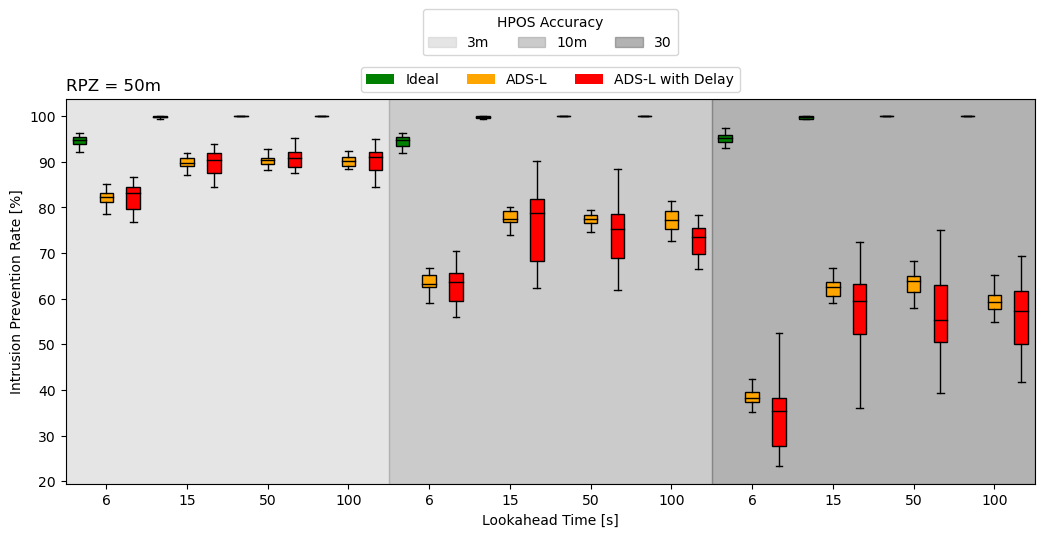

In [188]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
 
dt_lookahead_list = [6, 15, 50, 100]
rpz_list = ['50']
hpos_list = [1.5, 5.0, 15.0]

figure_idx = 0

data = []

for hpos in hpos_list:

    figure_idx += 1
    plt.figure(figure_idx)
    for RPZ in rpz_list:
        for dt_lookahead in dt_lookahead_list:
    #         for cond in ['comm_ideal', 'comm_no_noise', 'comm_noise']:
            for cond in ['comm_ideal', 'comm_no_noise', 'comm_noise']:
                data.append(statistic[cond][f'DT_{dt_lookahead}_RPZ_{RPZ}_hpos_{hpos}']['IPR'])
            
boxplot = plt.boxplot(data, showfliers=False, patch_artist=True)

plt.xticks(range(2, 36, 3))
ax = plt.gca()
ax.set_xticklabels(['6', '15', '50', '100'] * 3)

colors = plt.cm.gray(np.linspace(0.8, 0.2, 4))
area_1 = ax.axvspan(0.5, 12.5, alpha=0.5, color=colors[0])
area_2 = ax.axvspan(12.5, 24.5, alpha=0.5, color=colors[1])
area_3 = ax.axvspan(24.5, 36.5, alpha=0.5, color=colors[2])

colors = ['green', 'orange', 'red'] * len(dt_lookahead_list) * len(rpz_list) * len(hpos_list)

for box, color in zip(boxplot['boxes'], colors):
    box.set(facecolor=color)

for median in boxplot['medians']:
    median.set(color='black')

legend_handles = [mpatches.Patch(facecolor=colors[0]), mpatches.Patch(facecolor=colors[1]), mpatches.Patch(facecolor=colors[2])]

#     for color in colors:
#         legend_handles.append(mpatches.Patch(facecolor=color))

legend_labels = ['Ideal', 'ADS-L', 'ADS-L with Delay']
legend1 = plt.legend(legend_handles, legend_labels, ncols = 3, bbox_to_anchor=(0.5, 1.1), loc="upper center")
legend2 = plt.legend((area_1, area_2, area_3), ('3m', '10m', '30'), bbox_to_anchor=(0.5, 1.25), loc="upper center", ncol = 3, title = 'HPOS Accuracy')

plt.gca().add_artist(legend1)
# plt.gca().add_artist(legend2)

# plt.title(f'HPOS 95% Bound {hpos}')
plt.xlabel("Lookahead Time [s]")
plt.ylabel("Intrusion Prevention Rate [%]")
plt.title("RPZ = 50m", loc = "left")
fig = plt.gcf()
fig.set_size_inches(12.5, 5)
